In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("")))))
from src.pre_process.V4.feature_add import FeatureAddition
from src.pre_process.V4.feature_duplicate import FeatureDuplication

In [3]:
BASE_PATH = r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\data\etc'
data = pd.read_csv('v9.csv')
# train_data = pd.read_csv(os.path.join(BASE_PATH, 'train.csv'))
# test_data = pd.read_csv(os.path.join(BASE_PATH, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(BASE_PATH, 'sample_submission.csv'))

---

# data 확인

In [4]:
data

,index,_type,contract_year_month,contract_day,area_m2,contract_date_numeric,floor,built_year,latitude,longitude,...,school_grid_id,nearest_subway_distance,nearest_subway_idx,subway_grid_id,park_count,school_count,subway_count,date_length,contract_date,contract_timestamp
0,0,train,201906,25,84.9981,20190625,9,2019,37.054314,127.045216,...,521.0,716.952948,12,521.0,9.0,15,1,8,2019-06-25,1561388400
1,1,train,202003,26,84.9981,20200326,20,2019,37.054314,127.045216,...,521.0,716.952948,12,521.0,9.0,15,1,8,2020-03-26,1585148400
2,2,train,202003,28,84.9981,20200328,8,2019,37.054314,127.045216,...,521.0,716.952948,12,521.0,9.0,15,1,8,2020-03-28,1585321200
3,3,train,201907,15,59.3400,20190715,1,1986,36.964647,127.055847,...,121.0,3897.279708,10,222.0,7.0,3,1,8,2019-07-15,1563116400
4,4,train,201904,12,59.8100,20190412,6,1995,36.972390,127.084514,...,222.0,2039.685349,10,222.0,1.0,6,1,8,2019-04-12,1554994800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,150167,test,202402,27,115.5101,20240227,17,2010,37.528394,126.659398,...,226.0,1483.044562,293,227.0,9.0,11,4,8,2024-02-27,1708959600
1951396,150168,test,202403,2,142.8738,20240302,4,2010,37.528394,126.659398,...,226.0,1483.044562,293,227.0,9.0,11,4,8,2024-03-02,1709305200
1951397,150169,test,202403,16,142.8738,20240316,13,2010,37.528394,126.659398,...,226.0,1483.044562,293,227.0,9.0,11,4,8,2024-03-16,1710514800
1951398,150170,test,202403,22,114.9285,20240322,2,2010,37.528394,126.659398,...,226.0,1483.044562,293,227.0,9.0,11,4,8,2024-03-22,1711033200


In [5]:
data.columns

Index(['index', '_type', 'contract_year_month', 'contract_day', 'area_m2',
       'contract_date_numeric', 'floor', 'built_year', 'latitude', 'longitude',
       'age', 'contract_0', 'contract_1', 'deposit', 'apt_idx', 'area',
       'grid_deposit', 'apt_deposit_rank', 'apt_area_deposit_rank',
       'recent_deposit', 'interest_rate', 'grid_id', 'nearest_park_distance',
       'nearest_park_idx', 'park_grid_id', 'park_area',
       'nearest_school_distance', 'nearest_school_idx', 'school_grid_id',
       'nearest_subway_distance', 'nearest_subway_idx', 'subway_grid_id',
       'park_count', 'school_count', 'subway_count', 'date_length',
       'contract_date', 'contract_timestamp'],
      dtype='object')

---

# 추가 EDA

In [6]:
data.isnull().sum()

index                           0
_type                           0
contract_year_month             0
contract_day                    0
area_m2                         0
contract_date_numeric           0
floor                           0
built_year                      0
latitude                        0
longitude                       0
age                             0
contract_0                      0
contract_1                      0
deposit                    150172
apt_idx                         0
area                            0
grid_deposit                    0
apt_deposit_rank                0
apt_area_deposit_rank           0
recent_deposit              67857
interest_rate               11882
grid_id                         0
nearest_park_distance           0
nearest_park_idx                0
park_grid_id                   88
park_area                       0
nearest_school_distance         0
nearest_school_idx              0
school_grid_id                  0
nearest_subway

In [7]:
# recent_deposit 열의 NaN 값을 같은 행의 grid_deposit 값으로 대체
data['recent_deposit'] = data['recent_deposit'].fillna(data['grid_deposit'])

# 결과 확인
data.isnull().sum()  # 상위 5개의 데이터를 확인


index                           0
_type                           0
contract_year_month             0
contract_day                    0
area_m2                         0
contract_date_numeric           0
floor                           0
built_year                      0
latitude                        0
longitude                       0
age                             0
contract_0                      0
contract_1                      0
deposit                    150172
apt_idx                         0
area                            0
grid_deposit                    0
apt_deposit_rank                0
apt_area_deposit_rank           0
recent_deposit                  0
interest_rate               11882
grid_id                         0
nearest_park_distance           0
nearest_park_idx                0
park_grid_id                   88
park_area                       0
nearest_school_distance         0
nearest_school_idx              0
school_grid_id                  0
nearest_subway

In [9]:
data['park_count'] = data['park_count'].fillna(0)

---

# 모델링

In [8]:
train_data = data[data['_type'] == 'train']
test_data = data[data['_type'] == 'test']

In [9]:
column_needed = [
    # 'index', '_type', 'area_price', 'area_m2_price', 'original_index','contract_year_month', 'contract_day', 'area_m2',
    'contract_date_numeric', 
    'area_m2',
    'floor', 'built_year', 'latitude', 'longitude','age', 
    'contract_0', 'contract_1', 
    'deposit', 
    'apt_idx', 
    'area',
    'grid_deposit', 
    'apt_deposit_rank', 'apt_area_deposit_rank',
    'recent_deposit', 
    # 'interest_rate', 
    # 'grid_id',  'school_grid_id', 'park_grid_id', 'subway_grid_id',
    'nearest_park_distance','nearest_park_idx', 'park_area',
    'nearest_school_distance', 'nearest_school_idx',
    'nearest_subway_distance', 'nearest_subway_idx',
    'park_count', 'school_count', 'subway_count',
    # 'contract_timestamp',
]
test_column_needed = [
    # 'index', '_type', 'area_price', 'area_m2_price', 'original_index','contract_year_month', 'contract_day', 'area_m2',
    'contract_date_numeric',
    'area_m2',
    'floor', 'built_year', 'latitude', 'longitude','age', 
    'contract_0', 'contract_1',  
    'apt_idx', 
    'area',
    'grid_deposit', 
    'apt_deposit_rank', 'apt_area_deposit_rank',
    'recent_deposit', 
    # 'interest_rate', 
    # 'grid_id',  'school_grid_id', 'park_grid_id', 'subway_grid_id',
    'nearest_park_distance','nearest_park_idx', 'park_area',
    'nearest_school_distance', 'nearest_school_idx',
    'nearest_subway_distance', 'nearest_subway_idx',
    'park_count', 'school_count', 'subway_count',
    # 'contract_timestamp',
]
train_df = train_data[column_needed]
test_df = test_data[test_column_needed]

In [10]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
from tqdm import tqdm  # TQDM 임포트

# 학습에 사용할 데이터 준비
X_train = train_df.drop(columns=['deposit'])
y_train = train_df['deposit']
X_test = test_df.copy()

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 테스트 세트에 대한 예측을 저장할 배열
y_pred = np.zeros(len(X_test))

# 각 fold의 검증 MAE를 저장할 리스트
mae_list = []

# TQDM을 사용해 교차 검증 진행률 표시
with tqdm(total=kf.n_splits, desc="KFold Training Progress") as pbar:
    # KFold 교차 검증
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
        print(f"Fold {fold + 1}")
        
        # Train/Validation Split
        X_train_split, X_val_split = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_split, y_val_split = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # XGBoost를 위한 DMatrix 생성
        dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
        dval = xgb.DMatrix(X_val_split, label=y_val_split)
        dtest = xgb.DMatrix(X_test)
        
        # XGBoost 파라미터 설정
        params = {
            'objective': 'reg:absoluteerror',
            'eval_metric': 'mae',
            'max_depth': 6,
            'eta': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'seed': 42
        }
        
        # 모델 학습
        evals = [(dtrain, 'train'), (dval, 'eval')]
        model = xgb.train(params, dtrain, num_boost_round=1000, early_stopping_rounds=50, evals=evals, verbose_eval=100)
        
        # 검증 세트에 대한 예측
        y_val_pred = model.predict(dval)
        
        # MAE 계산
        mae = mean_absolute_error(y_val_split, y_val_pred)
        mae_list.append(mae)
        print(f"Fold {fold + 1} MAE: {mae}")
        
        # 테스트 세트에 대한 예측 (각 fold의 예측을 평균)
        y_pred += model.predict(dtest) / kf.n_splits
        
        # TQDM 진행 업데이트
        pbar.update(1)

# KFold 전체 평균 MAE 출력
mean_mae = np.mean(mae_list)
print(f"Mean MAE over all folds: {mean_mae}")

# 최종 예측 결과 출력
print("Final predictions for test set complete.")


KFold Training Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Fold 1
[0]	train-mae:16476.69763	eval-mae:16478.72657
[100]	train-mae:4221.19849	eval-mae:4219.91202
[200]	train-mae:4036.29512	eval-mae:4040.80096
[300]	train-mae:3957.61387	eval-mae:3965.85338
[400]	train-mae:3909.42503	eval-mae:3920.56349
[500]	train-mae:3874.78276	eval-mae:3888.74097
[600]	train-mae:3848.57202	eval-mae:3865.75046
[700]	train-mae:3827.00913	eval-mae:3846.80256
[800]	train-mae:3810.26696	eval-mae:3832.68236
[900]	train-mae:3793.90442	eval-mae:3818.68560
[999]	train-mae:3779.81643	eval-mae:3806.92751
Fold 1 MAE: 3806.927508546989


KFold Training Progress:  20%|██        | 1/5 [08:00<32:01, 480.36s/it]

Fold 2
[0]	train-mae:16492.78732	eval-mae:16472.71750
[100]	train-mae:4224.82023	eval-mae:4239.58250
[200]	train-mae:4038.60314	eval-mae:4054.50591
[300]	train-mae:3958.74280	eval-mae:3978.58072
[400]	train-mae:3910.66949	eval-mae:3933.41820
[500]	train-mae:3874.90032	eval-mae:3900.91722
[600]	train-mae:3849.81603	eval-mae:3879.43461
[700]	train-mae:3828.43917	eval-mae:3861.47284
[800]	train-mae:3811.35717	eval-mae:3847.09738
[900]	train-mae:3795.27093	eval-mae:3833.55436
[999]	train-mae:3780.98905	eval-mae:3821.69695
Fold 2 MAE: 3821.69694640852


KFold Training Progress:  40%|████      | 2/5 [15:51<23:45, 475.17s/it]

Fold 3
[0]	train-mae:16481.52620	eval-mae:16525.08082
[100]	train-mae:4222.26145	eval-mae:4241.64866
[200]	train-mae:4035.61227	eval-mae:4057.50898
[300]	train-mae:3953.81696	eval-mae:3979.45773
[400]	train-mae:3904.80738	eval-mae:3934.23574
[500]	train-mae:3868.40593	eval-mae:3901.24200
[600]	train-mae:3843.06601	eval-mae:3880.20056
[700]	train-mae:3822.78464	eval-mae:3862.73454
[800]	train-mae:3806.77173	eval-mae:3849.81204
[900]	train-mae:3791.42205	eval-mae:3837.68522
[999]	train-mae:3777.23069	eval-mae:3826.20747
Fold 3 MAE: 3826.2074694386624


KFold Training Progress:  60%|██████    | 3/5 [23:38<15:42, 471.17s/it]

Fold 4
[0]	train-mae:16487.33601	eval-mae:16426.93771
[100]	train-mae:4224.86026	eval-mae:4213.77862
[200]	train-mae:4043.04679	eval-mae:4040.00094
[300]	train-mae:3957.08842	eval-mae:3961.40724
[400]	train-mae:3910.40761	eval-mae:3919.37524
[500]	train-mae:3876.71820	eval-mae:3889.67255
[600]	train-mae:3847.51164	eval-mae:3863.80616
[700]	train-mae:3826.37134	eval-mae:3846.19984
[800]	train-mae:3807.94355	eval-mae:3830.56856
[900]	train-mae:3792.57697	eval-mae:3817.89122
[999]	train-mae:3779.27871	eval-mae:3807.64417
Fold 4 MAE: 3807.644170051046


KFold Training Progress:  80%|████████  | 4/5 [31:36<07:53, 473.89s/it]

Fold 5
[0]	train-mae:16468.46855	eval-mae:16504.05041
[100]	train-mae:4212.21299	eval-mae:4222.31435
[200]	train-mae:4039.48902	eval-mae:4055.82353
[300]	train-mae:3962.02036	eval-mae:3983.28585
[400]	train-mae:3912.42534	eval-mae:3938.97440
[500]	train-mae:3879.97270	eval-mae:3910.37436
[600]	train-mae:3853.13034	eval-mae:3886.82470
[700]	train-mae:3832.13825	eval-mae:3869.00104
[800]	train-mae:3812.93409	eval-mae:3852.95046
[900]	train-mae:3796.30122	eval-mae:3839.21536
[999]	train-mae:3781.17765	eval-mae:3827.01656
Fold 5 MAE: 3827.016562763086


KFold Training Progress: 100%|██████████| 5/5 [39:35<00:00, 475.10s/it]

Mean MAE over all folds: 3817.8985314416605
Final predictions for test set complete.


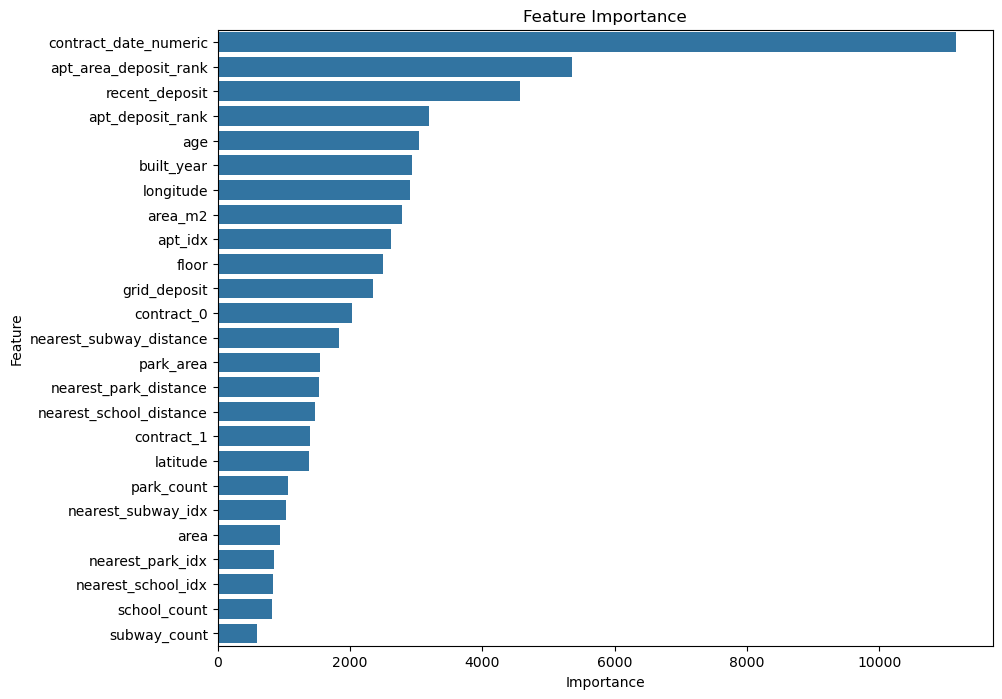

In [11]:
#Feature Importance
# 피처 중요도 추출
feature_importance = model.get_fscore()
# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])
# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [12]:
y_pred

array([22662.90966797,  7277.28503418,  6515.14050293, ...,
       45671.23535156, 37398.43408203, 38072.49658203])

In [13]:
sample_submission['deposit'] = y_pred
sample_submission

,index,deposit
0,0,22662.909668
1,1,7277.285034
2,2,6515.140503
3,3,6857.323120
4,4,6923.423218
...,...,...
150167,150167,37579.465820
150168,150168,43575.627930
150169,150169,45671.235352
150170,150170,37398.434082


In [14]:
sample_submission.describe()

,index,deposit
count,150172.00000,150172.000000
mean,75085.50000,39146.307116
std,43351.06665,24094.099133
min,0.00000,3259.244080
25%,37542.75000,23208.804565
50%,75085.50000,33802.184570
75%,112628.25000,48597.693604
max,150171.00000,445377.234375


In [15]:
sample_submission.to_csv('v8_xgb_1000_kfold.csv', index=False)

---